In [11]:
#https://github.com/jamesrobertlloyd/gpss-research/tree/master/data/tsdl
#https://cran.r-project.org/web/packages/rdatamarket/
#https://datamarket.com/data/list/?q=cat:ecc%20provider:tsdl

import pandas as pd
import numpy as np
import scipy.io


import pyaf.ForecastEngine as autof

%matplotlib inline  

url = "http://github.com/jamesrobertlloyd/gpss-research/blob/master/data/tsdl/ibm-common-stock-closing-prices-.mat?raw=true"

import requests
response = requests.get(url)
with open("ibm.mat", "wb") as file:
    file.write(response.content)
    file.close();

mat = scipy.io.loadmat("ibm.mat")

In [12]:
df = pd.DataFrame()
df['Date'] = mat['X'].T[0]
df['Signal'] = mat['y'].T[0]
df.head()

,Date,Signal
0,1961.375342,460.0
1,1961.378082,457.0
2,1961.380822,452.0
3,1961.389041,459.0
4,1961.391781,462.0


In [20]:
lEngine = autof.cForecastEngine()
lEngine.train(df, 'Date' , 'Signal' , 7)
lEngine


In [21]:
#lEngine.getModelInfo()
#lEngine.mSignalDecomposition.mTrPerfDetails

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1403: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


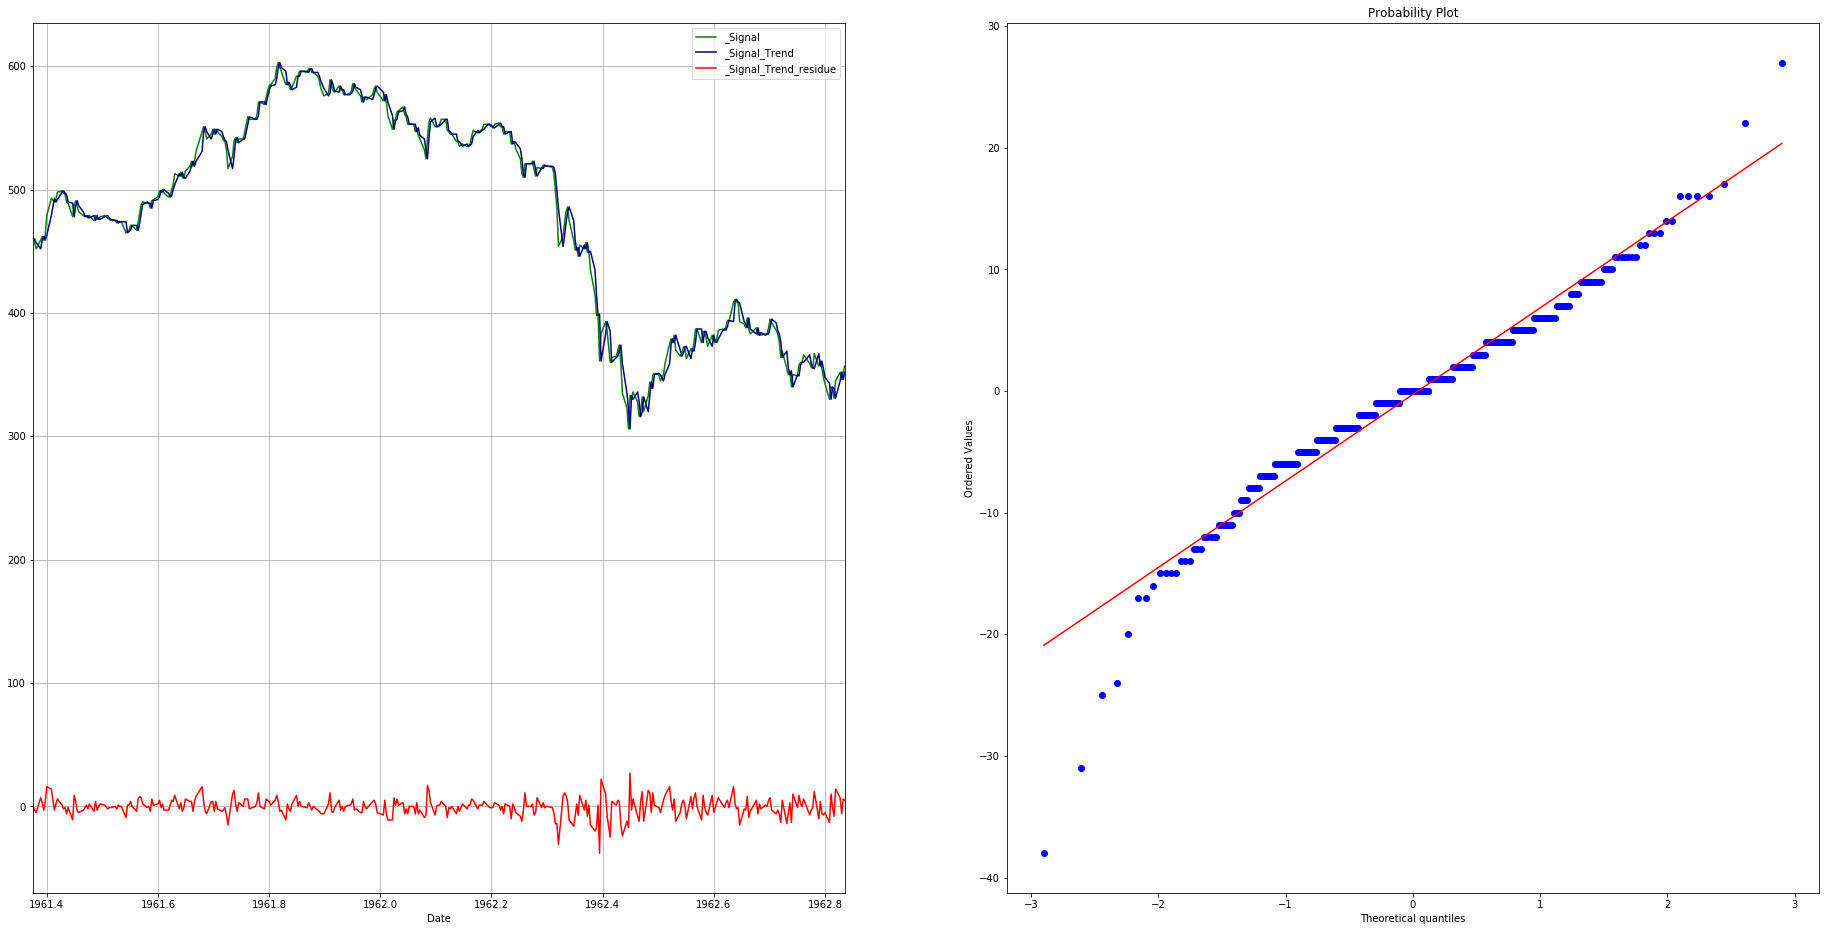

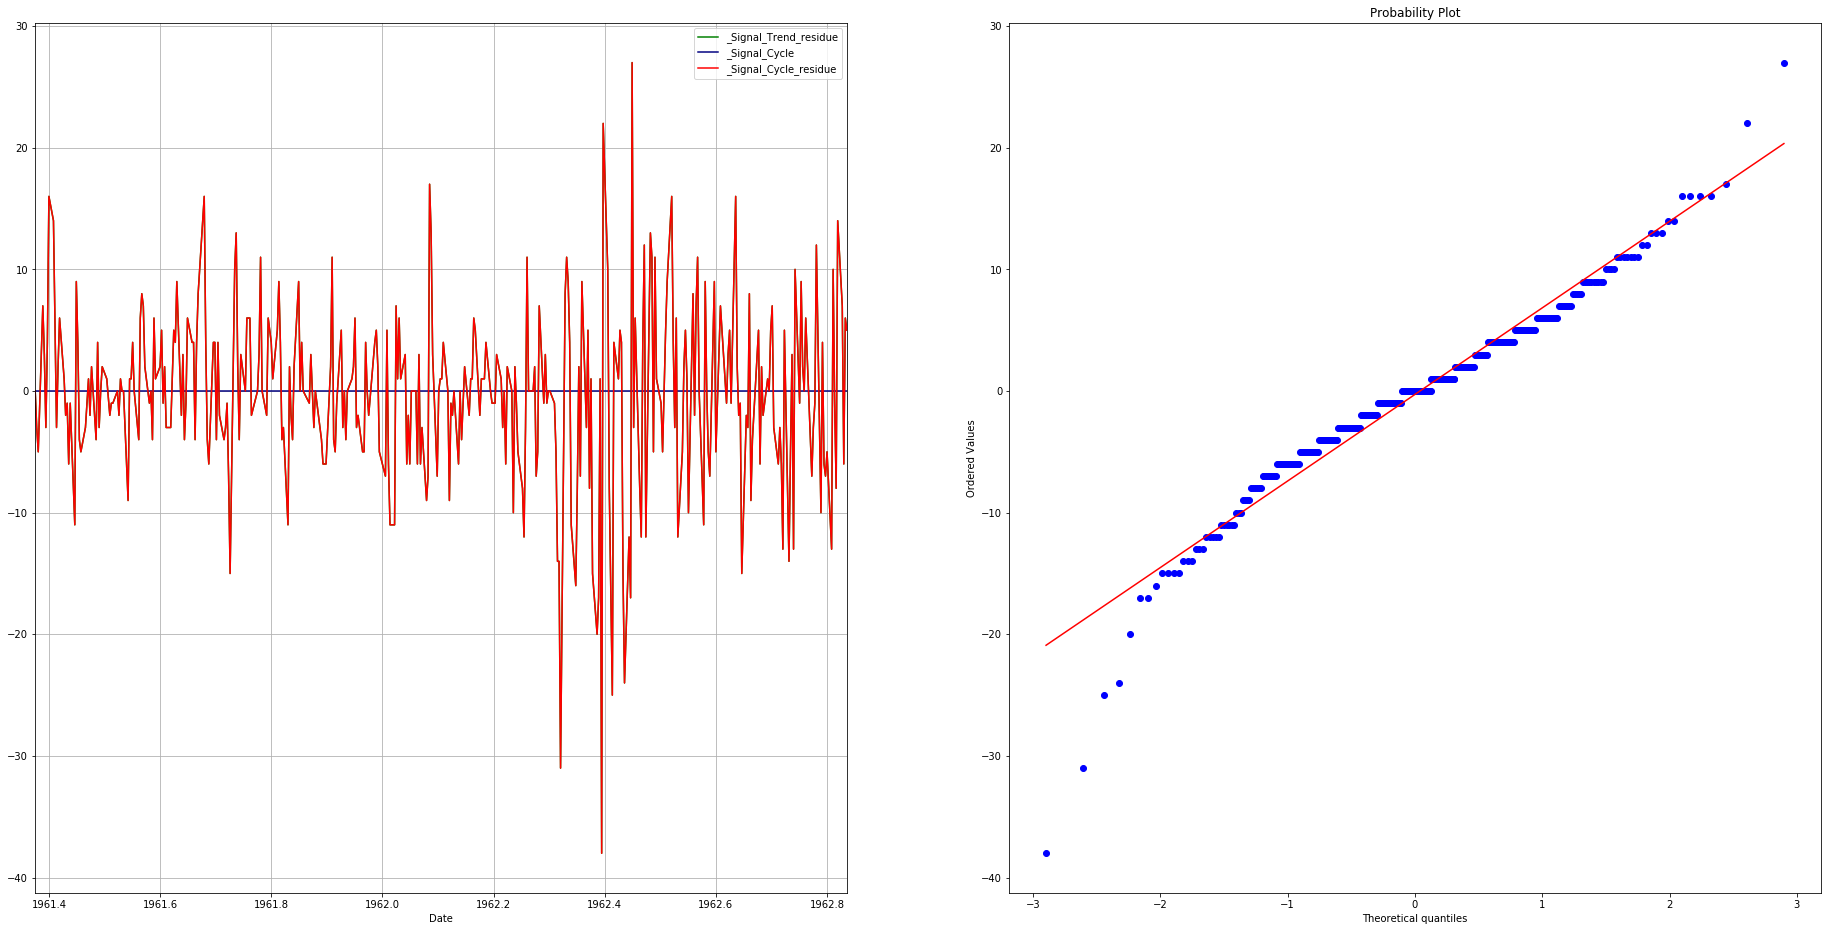

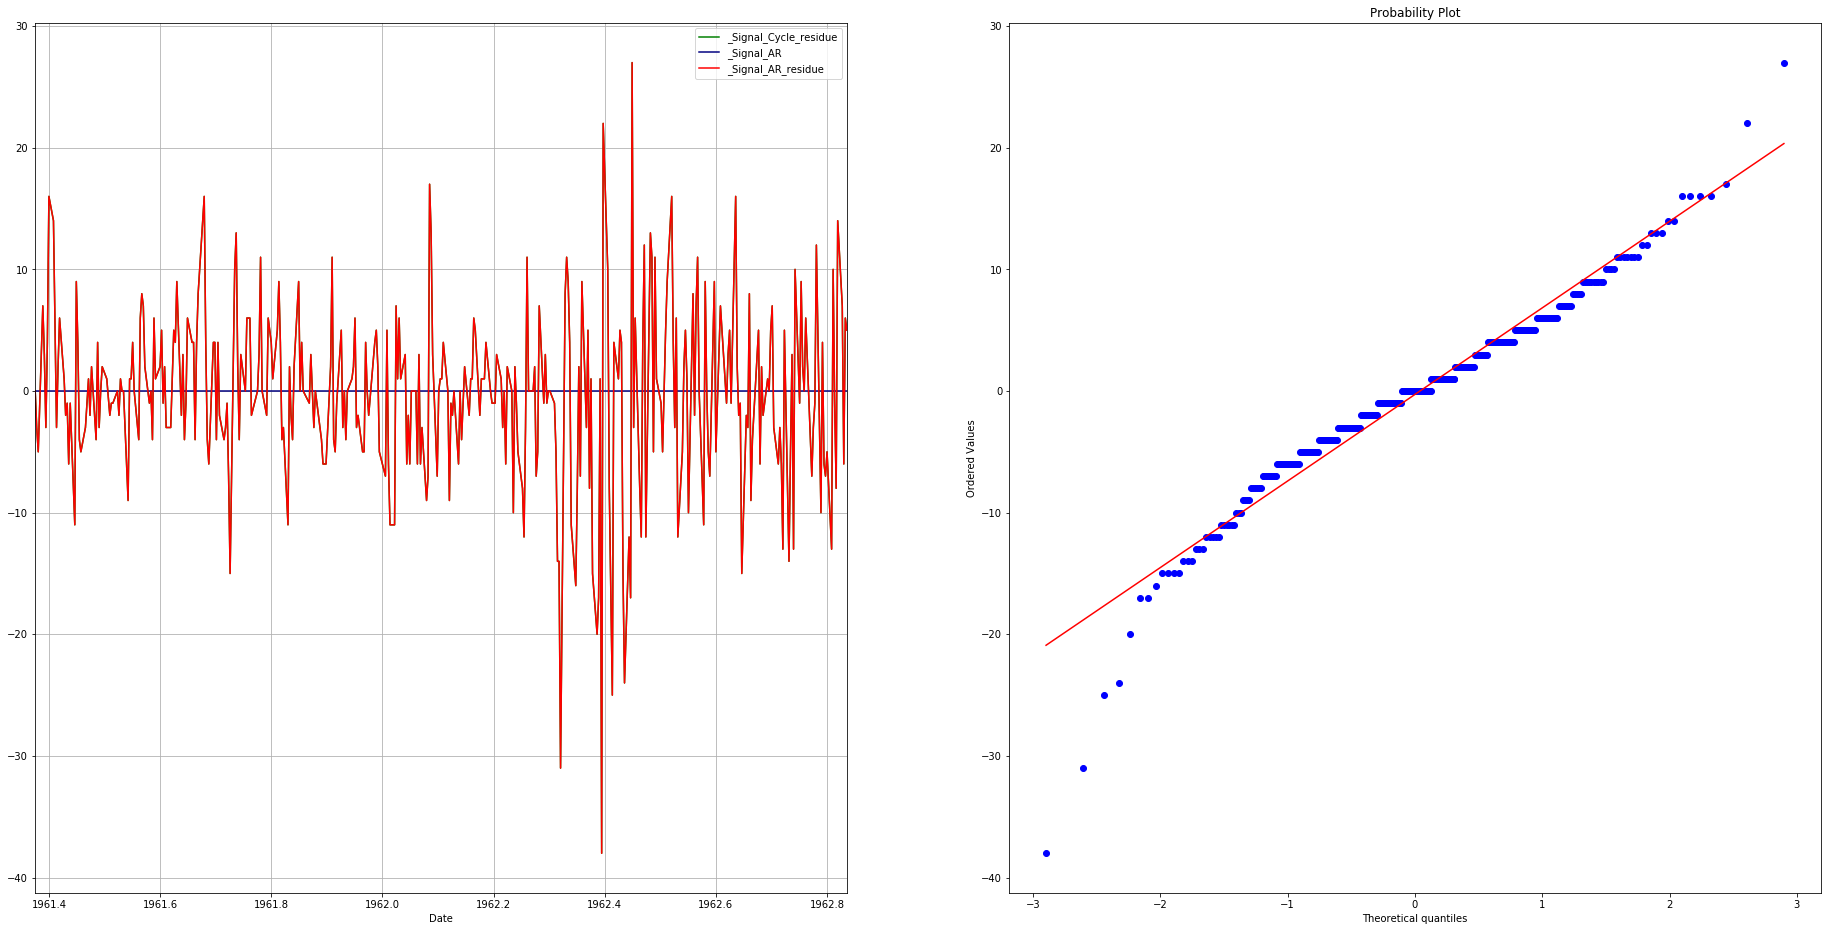

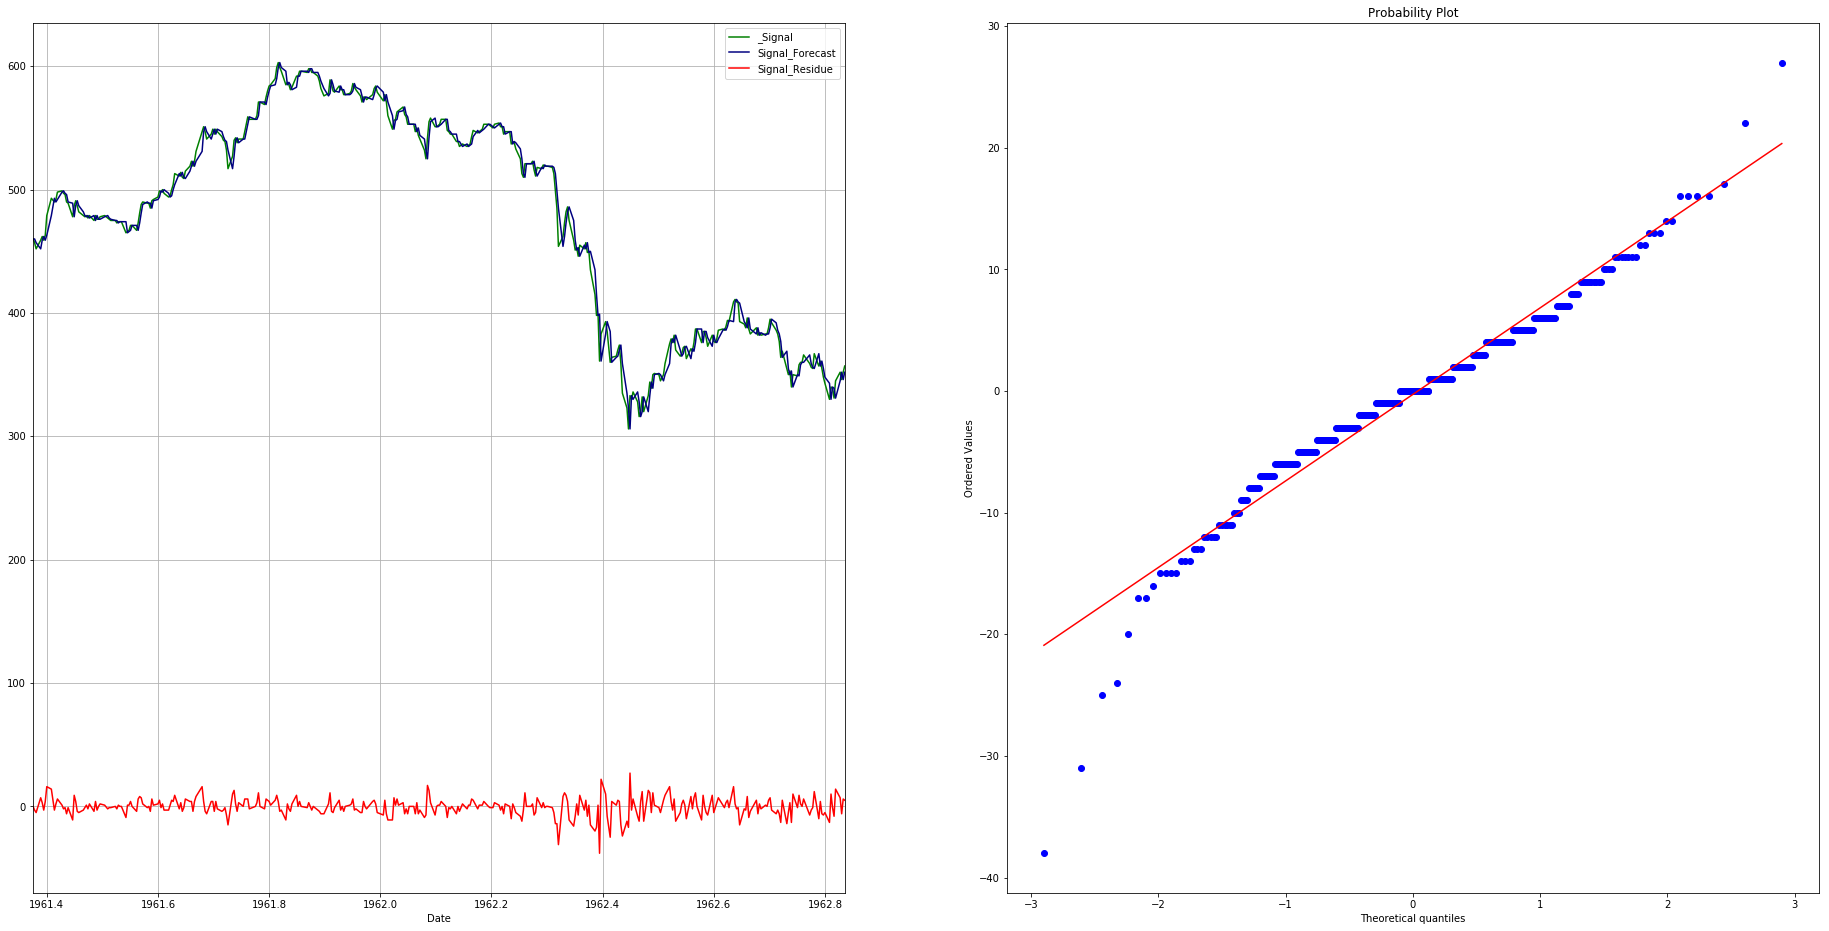

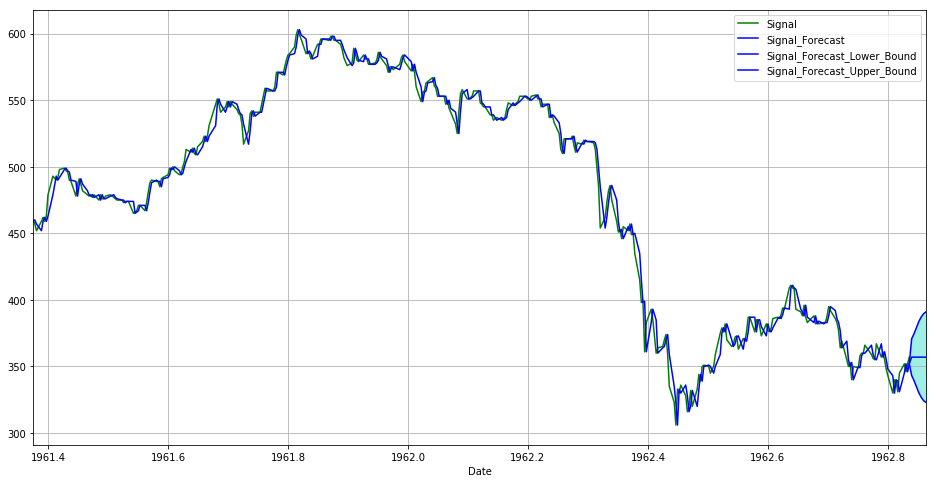

In [22]:
lEngine.standrdPlots()